In [29]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

# from sklearn.cluster import DBSCAN

adata = sc.read_h5ad('dataset.h5ad')
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
# sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
adata


AnnData object with n_obs × n_vars = 3005 × 19972
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

/tmp/ipykernel_30245/941632070.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.var.means[adata.var.means > 2], kde=False, ax=axs[0])


<Axes: xlabel='means'>

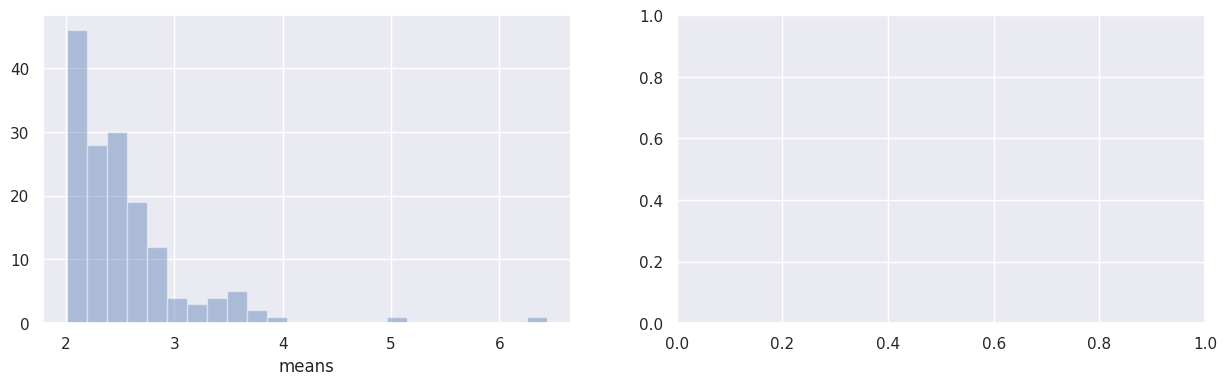

In [30]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# adata.var


fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sc.pp.filter_cells(adata, max_counts=40000)

sns.distplot(adata.var.means[adata.var.means > 2], kde=False, ax=axs[0])
# sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] > 40000], kde=False, bins=40, ax=axs[1])

#adata

In [31]:
# fig, axs = plt.subplots(1, 2, figsize=(15, 4))
# sc.pp.filter_cells(adata, max_counts=40000)
adata
# sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
# sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] > 40000], kde=False, bins=40, ax=axs[1])


AnnData object with n_obs × n_vars = 3005 × 19972
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [32]:
adata
# sc.pl.highly_variable_genes(adata)
adata.raw = adata

In [33]:
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)

In [34]:
sc.tl.pca(adata, svd_solver='arpack')



In [36]:
import scanpy as sc
import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

# Load or create your AnnData object 'adata'
# Make sure you have your preprocessed and dimension-reduced data

# Compute nearest neighbors (adjust n_neighbors and n_pcs as needed)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Define a range of resolution values to search
resolutions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.45]

# Define other parameters (e.g., n_neighbors, n_pcs) if needed
n_neighbors = [5, 10, 15]
n_pcs = [10, 20, 30]

# Create a parameter grid to search over
param_grid = {'resolution': resolutions, 'n_neighbors': n_neighbors, 'n_pcs': n_pcs}

# Initialize variables to store best results
best_resolution = None
best_silhouette_score = -1  # Initialize with a low value

# Perform grid search
for params in ParameterGrid(param_grid):
    # Create a copy of 'adata' for each parameter combination
    adata_copy = adata.copy()

    # Perform Leiden clustering with the current parameter combination
    sc.tl.leiden(adata_copy, resolution=params['resolution'])

    # Calculate the silhouette score as an evaluation metric
    labels = adata_copy.obs['leiden']
    X = adata_copy.X
    silhouette_avg = silhouette_score(X, labels)

    # Check if the current parameter combination is better
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_resolution = params['resolution']

print(f"Best Resolution: {best_resolution}")


AttributeError: module 'scanpy.metrics' has no attribute 'silhouette'

/home/g_nemesis/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


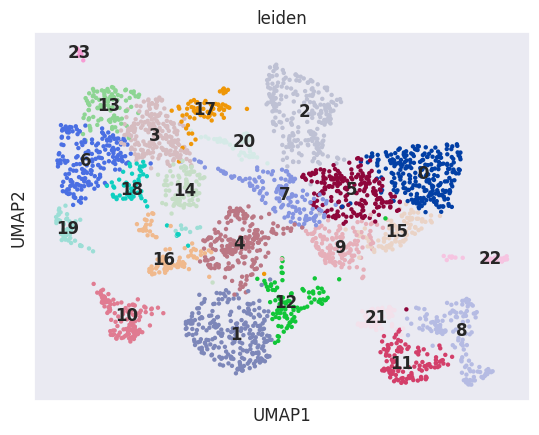

/home/g_nemesis/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


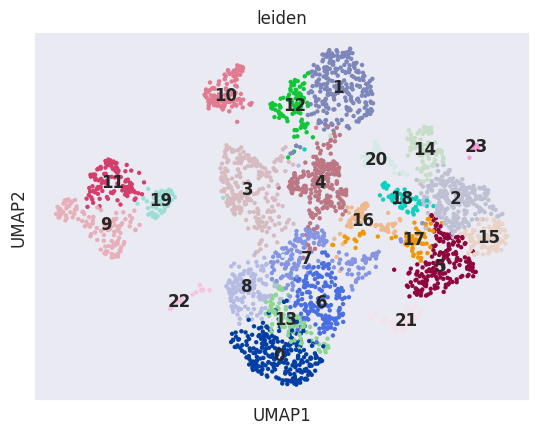

/home/g_nemesis/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


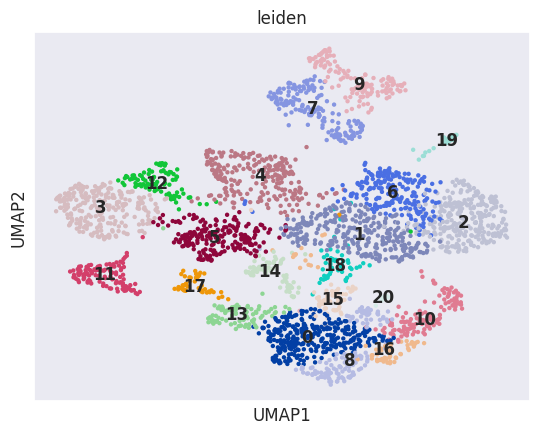

/home/g_nemesis/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


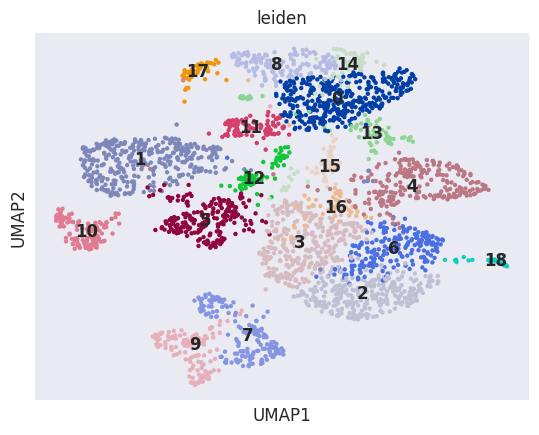

/home/g_nemesis/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


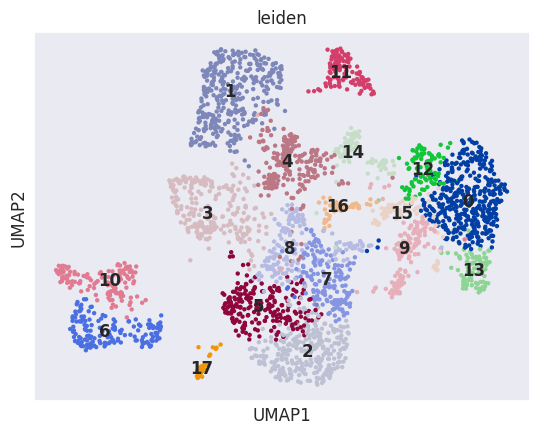

In [ ]:
# i = 10
# while i <= 30:
#     sc.pp.neighbors(adata, n_neighbors= i, n_pcs=40)
#     sc.tl.leiden(adata, resolution= 0.45)   
#     sc.tl.paga(adata)
#     sc.pl.paga(adata, plot=False)  
#     sc.tl.umap(adata, init_pos='paga')

#     sc.tl.leiden(adata)
#     sc.pl.umap(adata, color=['leiden'], legend_loc= 'on data')
#     i += 5



/home/g_nemesis/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


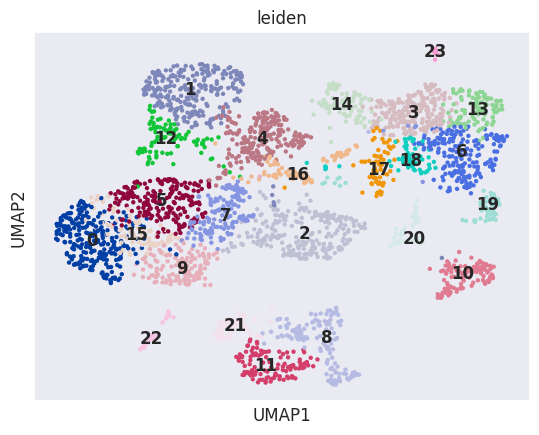

In [ ]:
# sc.pl.umap(adata, color=['leiden'], legend_loc= 'on data')

In [ ]:
# marker_genes = ['Slc32a1','Pnoc', 'Gm11549', 'Tbr1', 'Spink8', 'Fibcd1', 
# 'Tnfaip6','Hapln2', 'F13a1', 'C1qc', 'Flt1', 'Ly6c1', 'Fabp7', 'Lcat', 
# 'Ccdc153', 'Dynlrb2', 'Mustn1', 'Acta2']


# cell_type = {"0":"2",
#              "1":"1",
#              "2":"6",
#              "3":"3",
#              "4":"5",
#              "5":"2",
#              "6":"3",
#              "7":"2",
#              "8":"0",
#              "9":"2",
#              "10":"5",
#              "11":"0",
#              "12":"1",
#              "13":"3",
#              "14":"3",
#              "15":"2",
#              "16":"8",
#              "17":"3",
#              "18":"3",
#              "19":"3",
#              "20":"3",
#              "21":"0",
#              "22":"7",
#              "23":"5",     
#              }

# #19 as 3 is not clear in 0.45 resolution
# #20 as 3 is also not that clear
# #23 as 7 or 5

# # sc.pl.umap(adata, color=marker_genes, frameon = False)

In [ ]:
# adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
# # sc.pl.umap(adata, color=['cell_type'], legend_loc = 'on data')
# adata.obs.to_csv("new2 day.csv")
# adata

AnnData object with n_obs × n_vars = 3005 × 4209
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'leiden', 'cell_type'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'